# Exploratory Data Analysis for the Common Objects In Context(COCO) Dataset

In [3]:
import pathlib
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


### <u>Introduction</u>


### COCO dataset, which stands for "Common Objects in Context", is a large-scale dataset for object detection, segmentation and captioning tasks in computer vision.

### YOLO, which stands for "You Only Look Once" is a deep learning algorithm for real-time object detection. It consist of a neural network that takes input image/video and outputs bounding boxes and class probabilities for the objects detectd in the images


### YOLO model is trained on the COCO dataset to learn to detect objects in images and videos accurately.

### This notebook is designed to provide insights on the COCO 2017 dataset

### Dataset can be downloaded from the [ COCO dataset Website ](https://cocodataset.org/#download)

### *Please Note that the dataset is already split from the source(coco dataset website) into training, testing and validation set, it consists of image files in jpg format and annotation files in json format*

In [4]:

# Define data folders and annotation files
training_data_folder = pathlib.Path('./data/train2017')
test_data_folder = pathlib.Path('./data/test2017')
validation_data_folder = pathlib.Path('./data/val2017')
training_annotations_data_file = pathlib.Path('./data/annotations/instances_train2017.json')
validation_annotations_data_file = pathlib.Path('./data/annotations/instances_val2017.json')

# Load COCO annotations
def load_annotations(annotations_file):
    with open(annotations_file) as f:
        data = json.load(f)
    return data

# Load category names
def load_categories(data):
    categories = {}
    for category in data['categories']:
        categories[category['id']] = category['name']
    return categories

# Explore category distribution
def plot_category_distribution(data, categories):
    category_counts = {category: 0 for category in categories.values()}
    for annotation in data['annotations']:
        category_id = annotation['category_id']
        category_name = categories[category_id]
        category_counts[category_name] += 1
    
    plt.figure(figsize=(12, 6))
    plt.bar(category_counts.keys(), category_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Category Distribution')
    plt.show()

# Explore object distribution
def plot_object_distribution(data):
    image_object_counts = [len(annotation['bbox']) for annotation in data['annotations']]
    
    plt.figure(figsize=(8, 6))
    plt.hist(image_object_counts, bins=range(1, max(image_object_counts) + 2), align='left')
    plt.xlabel('Number of Objects')
    plt.ylabel('Number of Annotations')
    plt.title('Object Distribution')
    plt.grid(True)
    plt.show()

# EDA for persons and human faces
def eda_person_face(data, categories):
    person_counts = 0
    face_counts = 0
    for annotation in data['annotations']:
        category_id = annotation['category_id']
        category_name = categories[category_id]
        if category_name == 'person':
            person_counts += 1
        elif category_name == 'face':
            face_counts += 1
    
    print("Number of person annotations:", person_counts)
    print("Number of face annotations:", face_counts)


# Visualize sample images with bounding boxes
def visualize_samples(data_folder, data, categories, num_samples=5):
    sample_images = np.random.choice(data['images'], num_samples, replace=False)
    
    plt.figure(figsize=(15, 10*num_samples))
    for i, image_info in enumerate(sample_images):
        # image_path = data_folder / 'images' / image_info['file_name']
        image_path = data_folder / image_info['file_name']

        image = Image.open(image_path)
        plt.subplot(num_samples, 1, i+1)
        plt.imshow(image)
        plt.axis('off')
        for annotation in data['annotations']:
            if annotation['image_id'] == image_info['id']:
                bbox = annotation['bbox']
                category_id = annotation['category_id']
                category_name = categories[category_id]
                plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], 
                                                  linewidth=2, edgecolor='r', facecolor='none'))
                plt.text(bbox[0], bbox[1], category_name, fontsize=12, color='r', backgroundcolor='w')
    plt.show()

# Load annotations for training, test, and validation
training_annotations_data = load_annotations(training_annotations_data_file)
test_annotations_data = load_annotations(validation_annotations_data_file)
validation_annotations_data = load_annotations(validation_annotations_data_file)

# Load categories
categories = load_categories(training_annotations_data)


### DATASET SUMMARY COUNT FOR TRAIN, TEST AND VALAIDATION IMAGES

In [5]:

# Count total number of images in a folder
def count_images_in_folder(folder):
    return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

# Count total number of unique object classes
def count_unique_classes(data):
    return len(data['categories'])

# Count total number of annotations
def count_annotations(data):
    return len(data['annotations'])


# Load COCO annotations file
annotations_file = pathlib.Path('./data/annotations/instances_train2017.json')
with open(annotations_file) as f:
    data = json.load(f)

# Extract category names
category_names = [category['name'] for category in data['categories']]



# Count total number of images in each folder
training_images_count = count_images_in_folder(training_data_folder)
test_images_count = count_images_in_folder(test_data_folder)
validation_images_count = count_images_in_folder(validation_data_folder)

# Count total number of annotations in each dataset
training_annotations_count = count_annotations(training_annotations_data)
test_annotations_count = count_annotations(test_annotations_data)
validation_annotations_count = count_annotations(validation_annotations_data)


# Count total number of unique object classes
total_unique_classes = count_unique_classes(training_annotations_data)


print("Total number of unique object classes:", total_unique_classes)


Total number of unique object classes: 80


#### TRAINING DATASET SUMMARY

Total number of images in training folder: 118287
Total number of annotations in training dataset: 860001
Number of person annotations: 262465
Number of face annotations: 0

Category Distribution for Training Data:


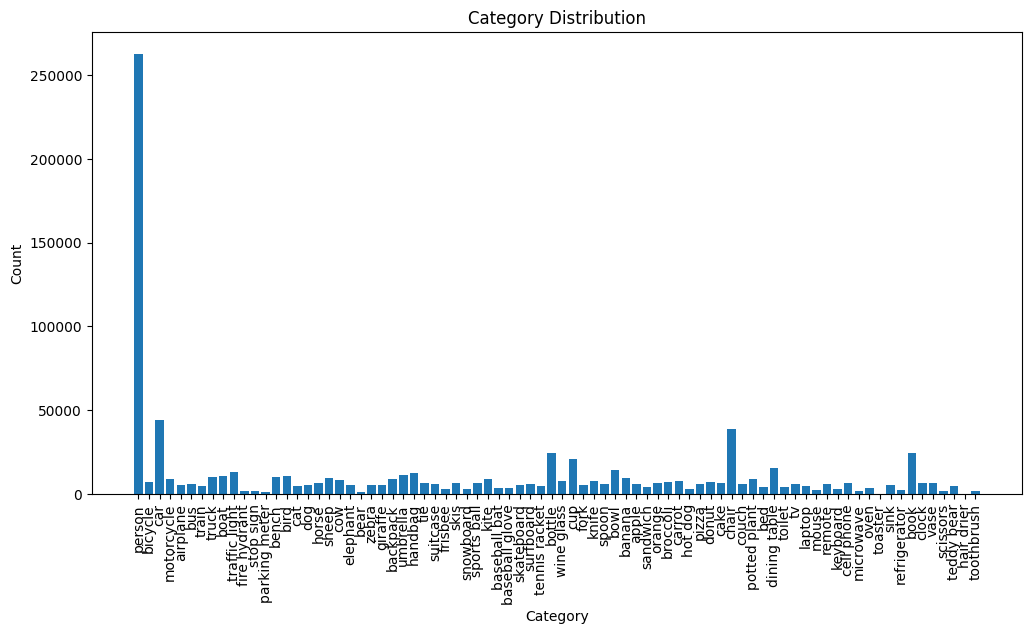


Object Distribution for Training Data:


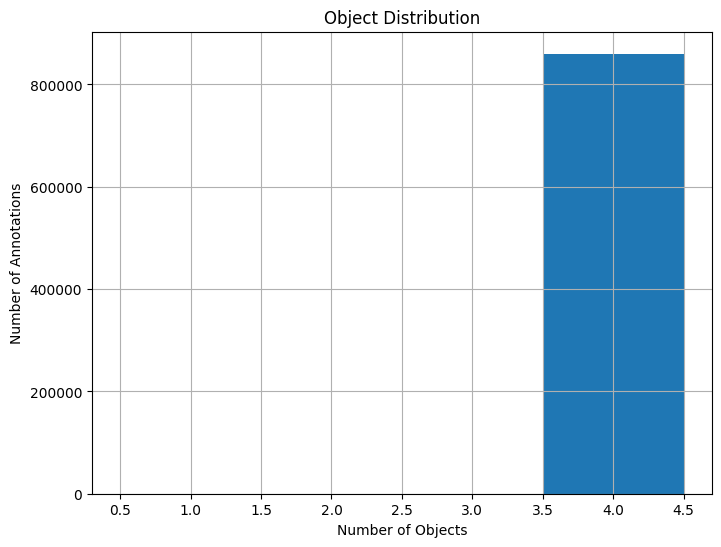

In [6]:

# Load annotations for training, test, and validation
training_annotations_data = load_annotations(training_annotations_data_file)

# Load categories
categories = load_categories(training_annotations_data)


print("Total number of images in training folder:", training_images_count)
print("Total number of annotations in training dataset:", training_annotations_count)


# Specific EDA for persons and human faces in training data
# print("\nPersons and Human Faces in Training Data:")
eda_person_face(training_annotations_data, categories)


# General EDA for Training Data
print("\nCategory Distribution for Training Data:")
plot_category_distribution(training_annotations_data, categories)
print("\nObject Distribution for Training Data:")
plot_object_distribution(training_annotations_data)


#### TESTING DATASET SUMMARY

In [7]:

print("Total number of images in test folder:", test_images_count)


Total number of images in test folder: 40670


#### VALIDATION DATASET SUMMARY

Total number of images in validation folder: 5000
Total number of annotations in validation dataset: 36781
Number of person annotations: 11004
Number of face annotations: 0

Category Distribution for Validation Data:


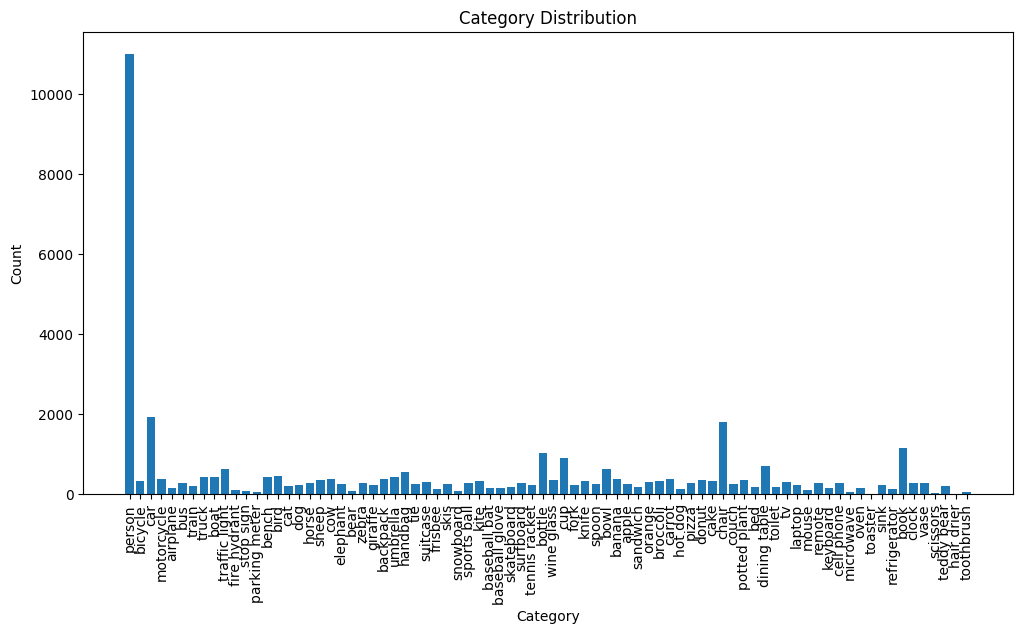


Object for Validation Data:


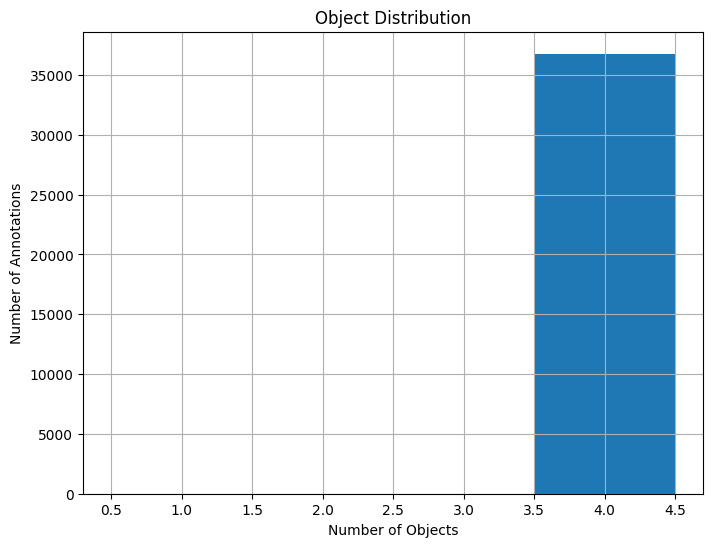

In [8]:

validation_annotations_data = load_annotations(validation_annotations_data_file)


print("Total number of images in validation folder:", validation_images_count)
print("Total number of annotations in validation dataset:", validation_annotations_count)


# Specific EDA for persons and human faces in validation data
# print("\nPersons and Human Faces in Validation Data:")
eda_person_face(validation_annotations_data, categories)


# General EDA for Validation Data
print("\nCategory Distribution for Validation Data:")
plot_category_distribution(validation_annotations_data, categories)
print("\nObject for Validation Data:")
plot_object_distribution(validation_annotations_data)


#### VISUALIZATION OF SAMPLE IMAGES AND THEIR ANNOTATIONS, ALSO FIND BELOW A LIST OF ALL 80 CATEGORIES IN THE DATASET

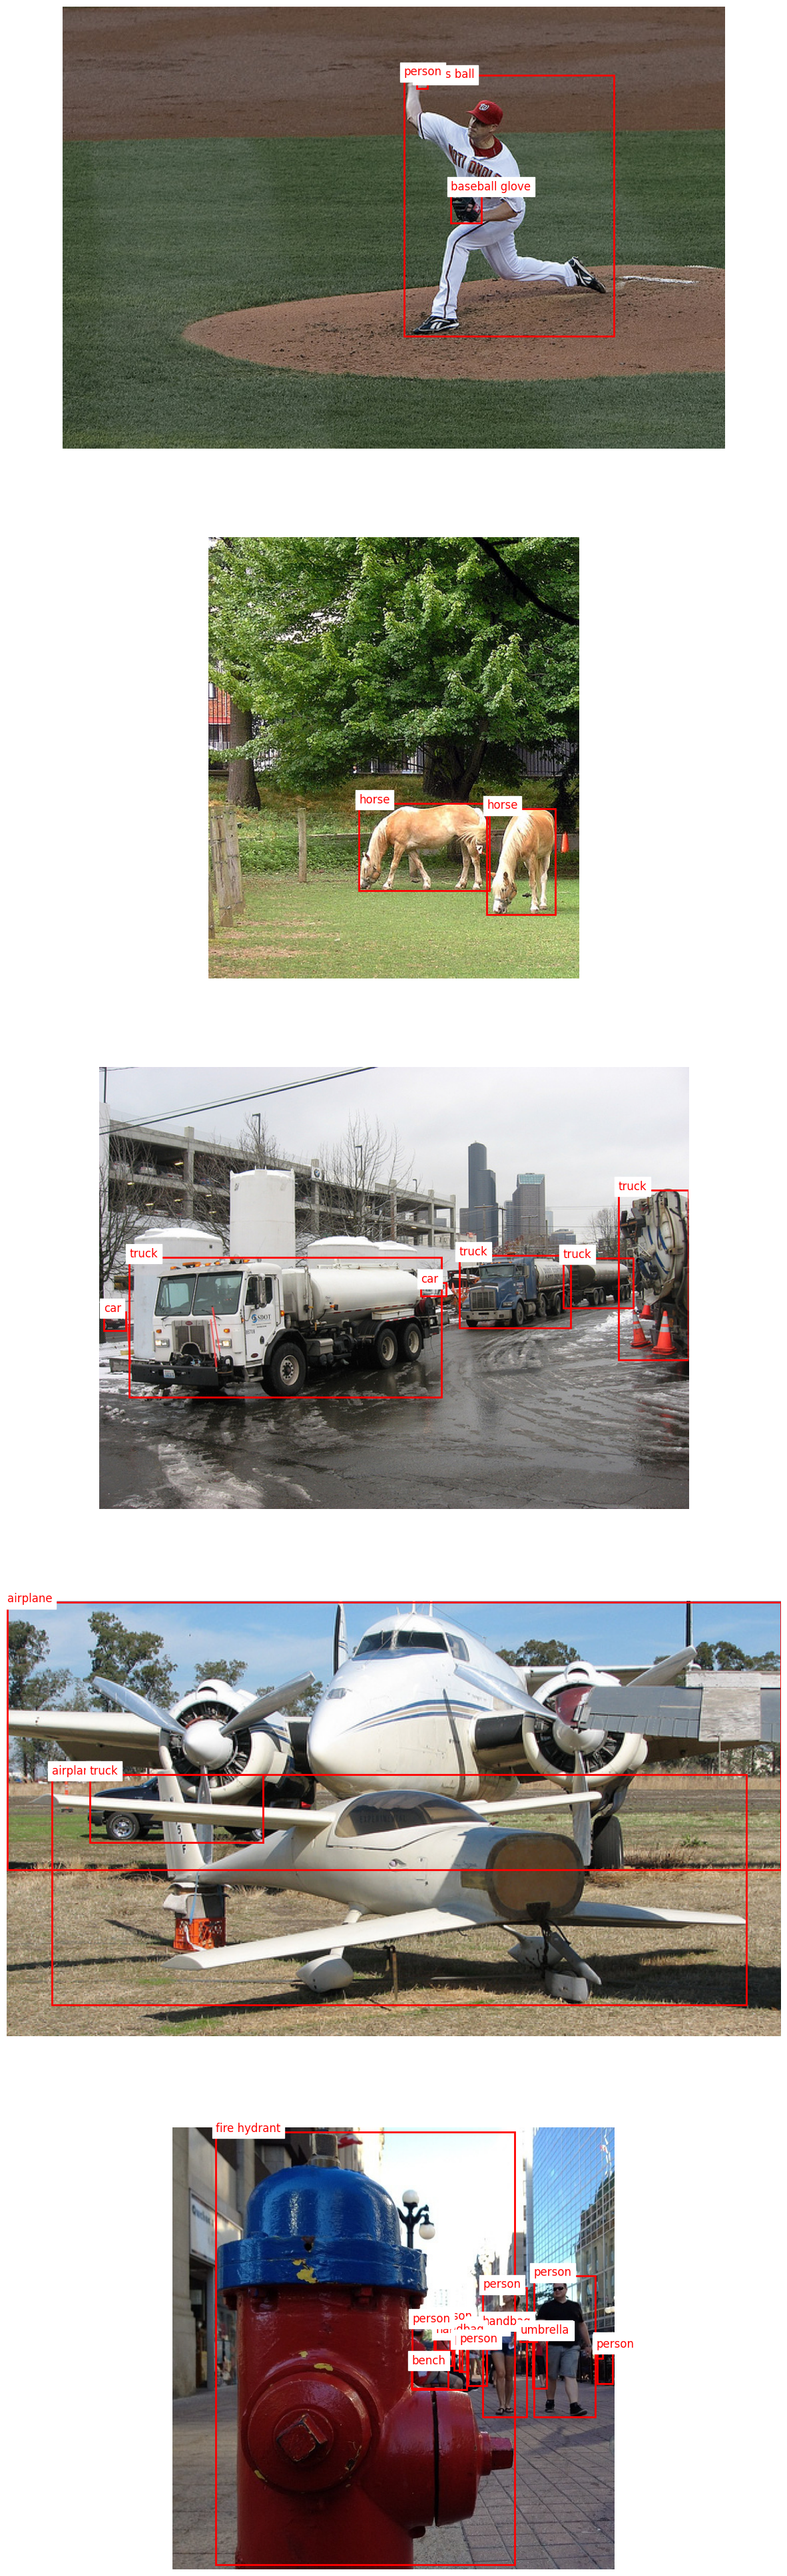

List of all categories:
person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [9]:
# Visualize sample images with bounding boxes
visualize_samples(training_data_folder, training_annotations_data, categories)


# Print the list of category names
print("List of all categories:")
for category_name in category_names:
    print(category_name)
